# Importing dependencies

In [1]:
%matplotlib inline

# Statistics
from scipy.stats import zscore

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")


# Loading data

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

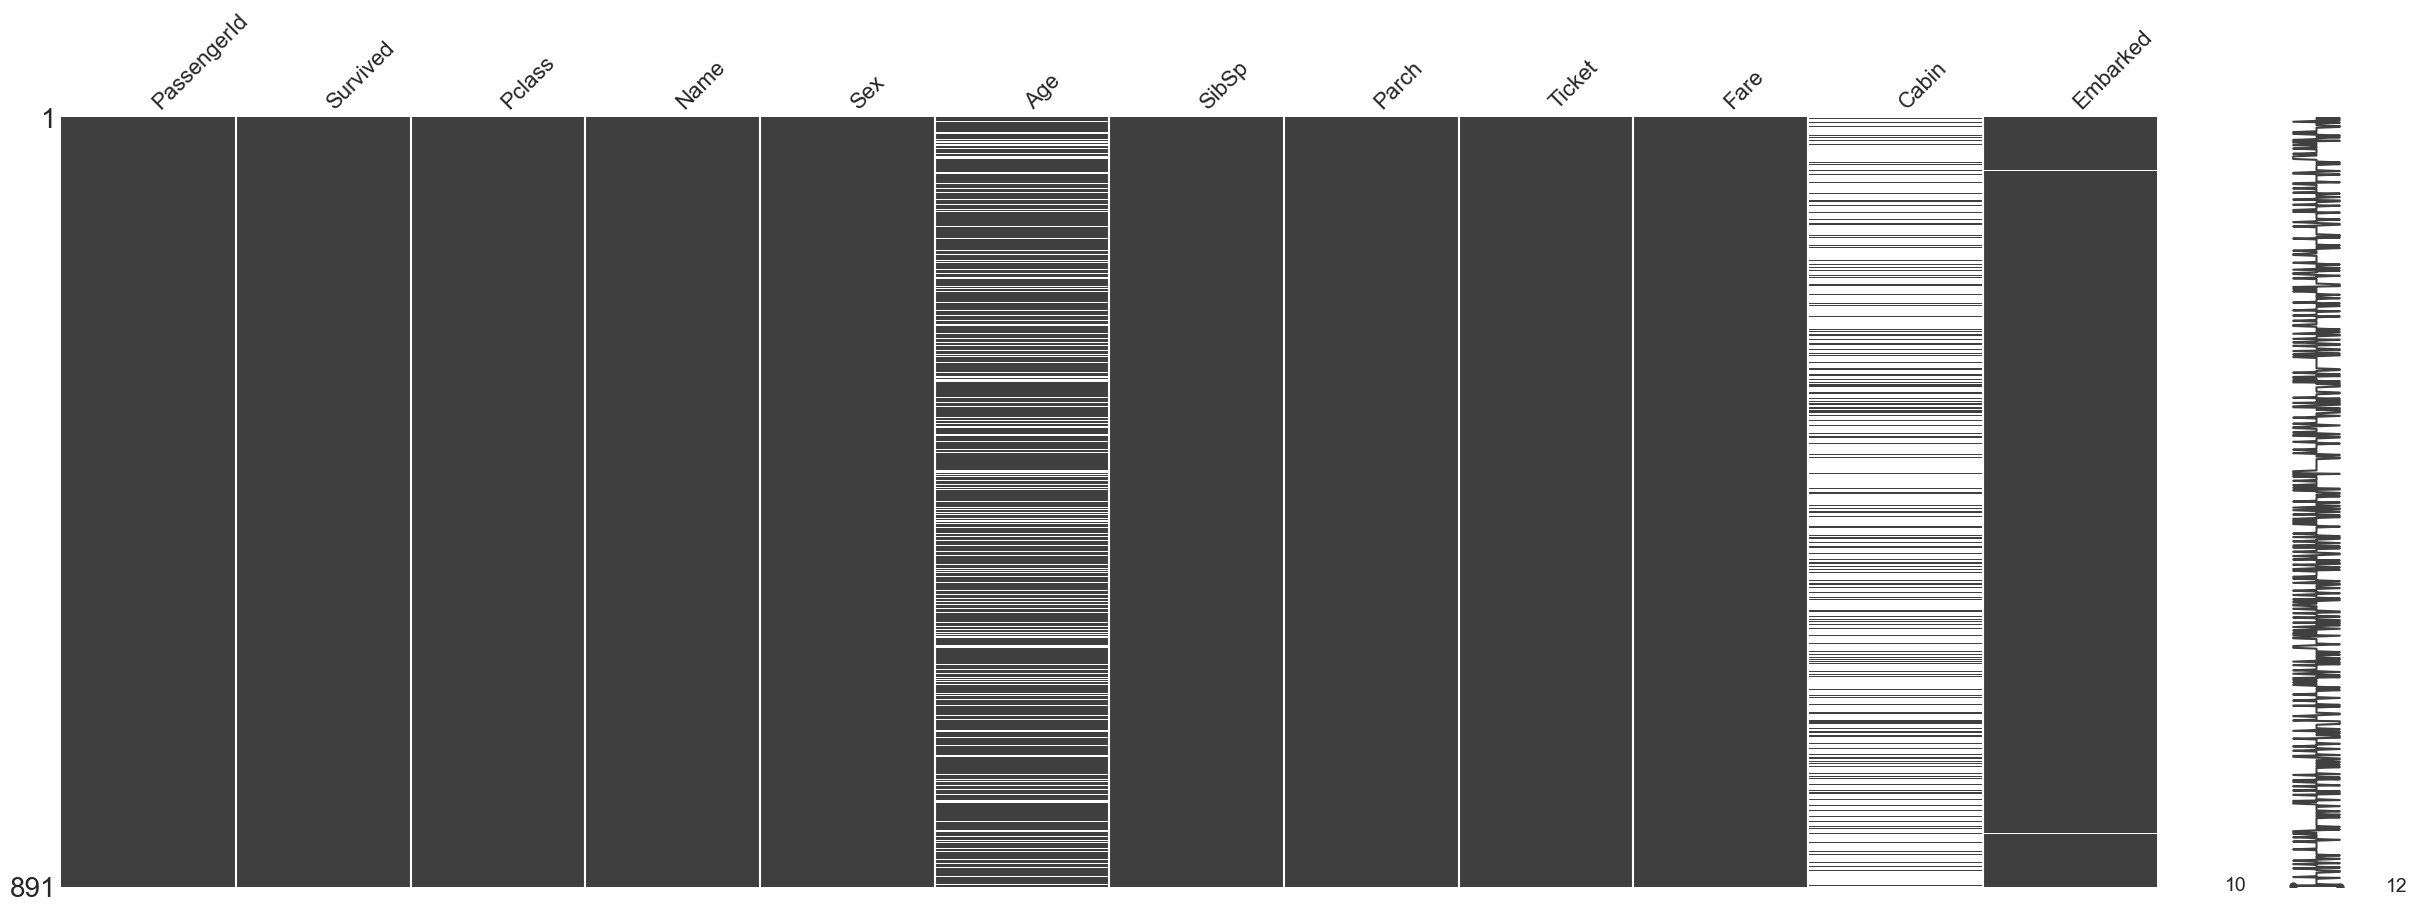

In [3]:
# Missing values
missingno.matrix(data, figsize = (30,10))

In [4]:
# Data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Feature Cleaning, Engineering, and Imputation

## Feature: Survided
Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

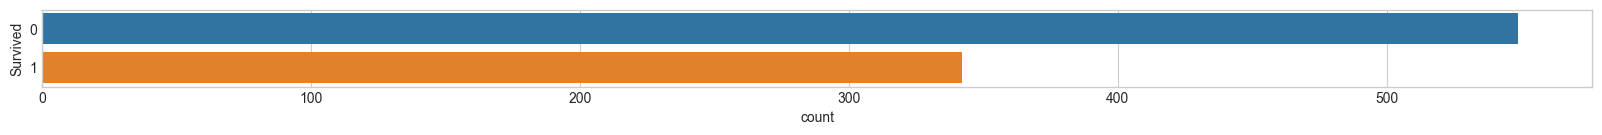

In [5]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=data);

## Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/4051185555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Pclass)


<Axes: xlabel='Pclass', ylabel='Density'>

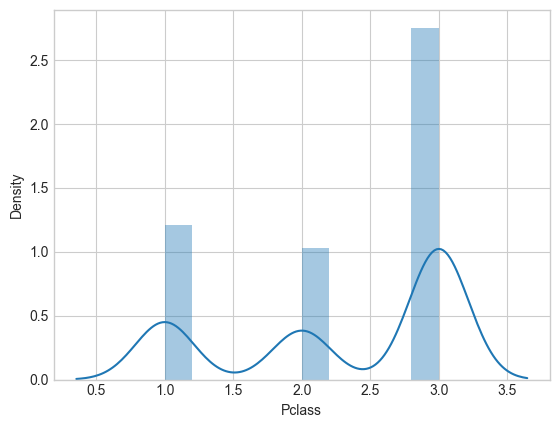

In [6]:
sns.distplot(data.Pclass)

In [7]:
# Are there any missing values in the Pclass column?
data.Pclass.isnull().sum()

0

## Feature: Name
Description: The name of the passenger.

To keep this EDA fast, we won't move forward using the name variable.

## Feature: Sex
    
Description: The sex of the passenger (male or female).

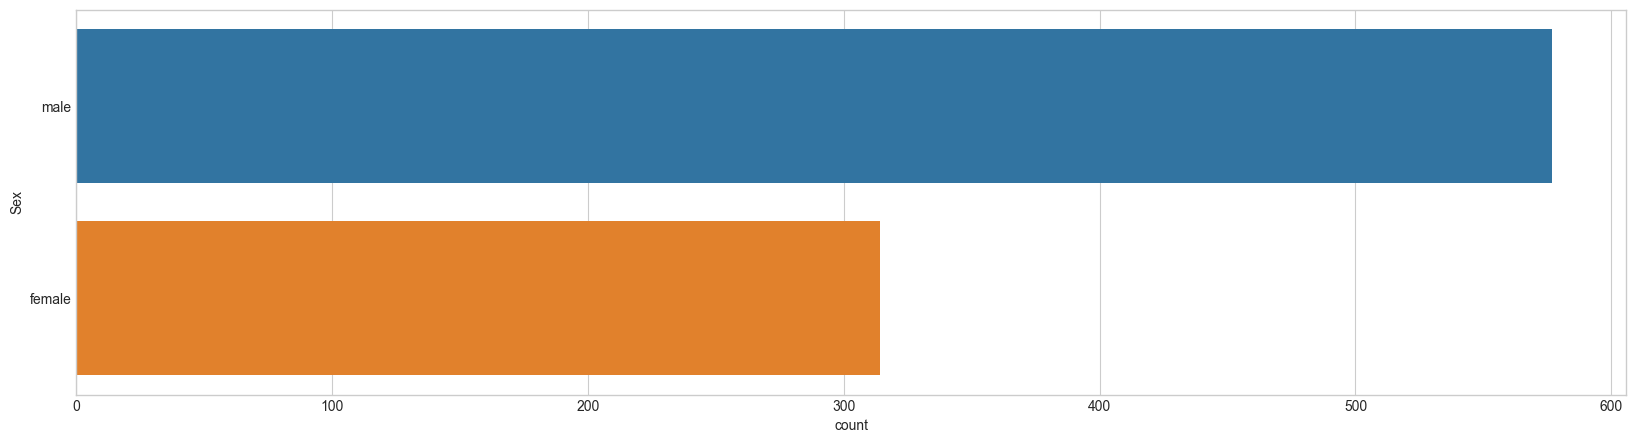

In [8]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=data);

In [9]:
# Are there any missing values in the Pclass column?
data.Sex.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/2977723993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_df['Sex'] = np.where(sex_df['Sex'] == 'female', 1, 0)
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/2977723993.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sex_df.loc[sex_df['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
/var/folders/5f

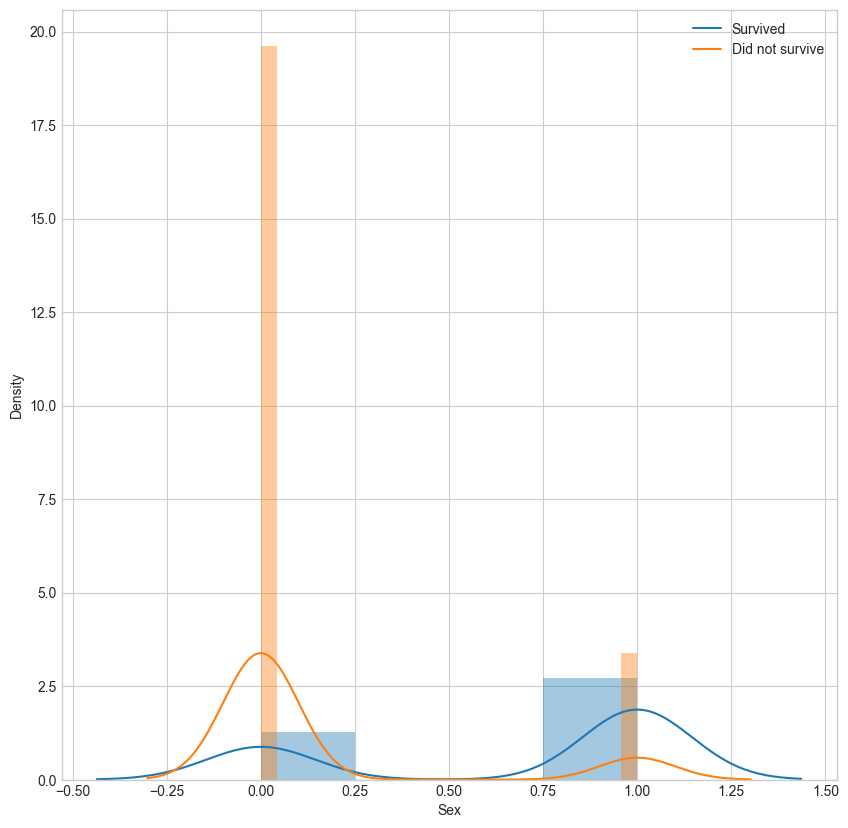

In [10]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sex_df = data[['Survived', 'Sex']]
sex_df['Sex'] = np.where(sex_df['Sex'] == 'female', 1, 0)

sns.distplot(sex_df.loc[sex_df['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(sex_df.loc[sex_df['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Age
Description: The age of the passenger.

In [11]:
# How many missing values does age have?
data.Age.isnull().sum()

177

## Feature: SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [12]:
# How many missing values does SibSp have?
data.SibSp.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/1167534382.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sibsp_df.loc[sex_df['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'})
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/1167534382.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

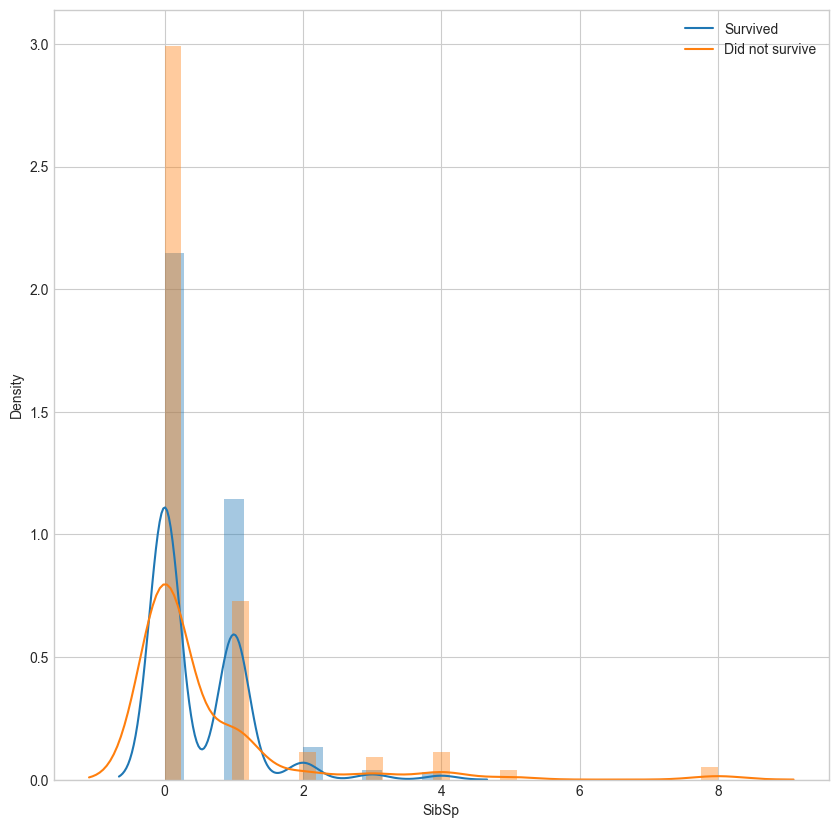

In [13]:
# How does the SibSp variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sibsp_df = data[['Survived', 'SibSp']]

sns.distplot(sibsp_df.loc[sex_df['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'})
sns.distplot(sibsp_df.loc[sex_df['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

In [14]:
# How many missing values does SibSp have?
data.Parch.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/424382108.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(parch_df.loc[parch_df['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'})
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_30661/424382108.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

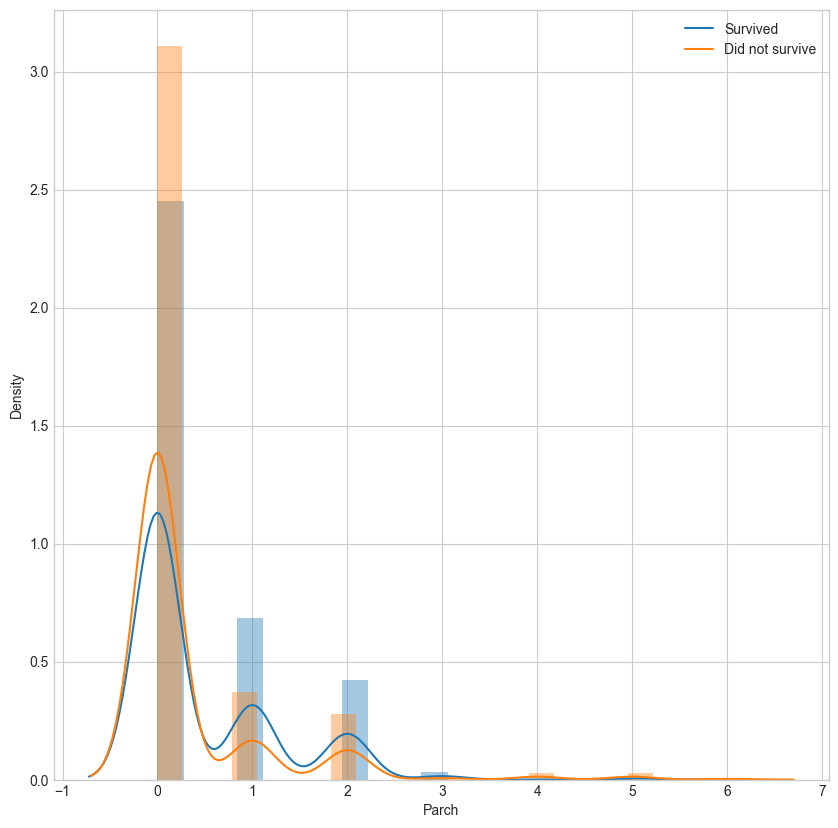

In [15]:
# How does the Parch variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
parch_df = data[['Survived', 'Parch']]

sns.distplot(parch_df.loc[parch_df['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'})
sns.distplot(parch_df.loc[parch_df['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Ticket
Description: The ticket number of the boarding passenger.

In [16]:
# How many missing values does Ticket have?
data.Ticket.isnull().sum()

0

In [17]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(data.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

## Feature: Fare
Description: How much the ticket cost.

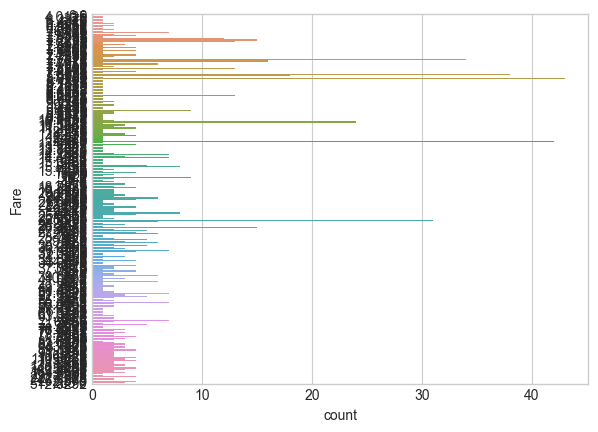

In [18]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=data);

## Feature: Cabin
Description: The cabin number where the passenger was staying.

In [19]:
# How many missing values does Cabin have?
data.Cabin.isnull().sum()

687

Since there are too many missing values, we won't use Cabin.

## Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

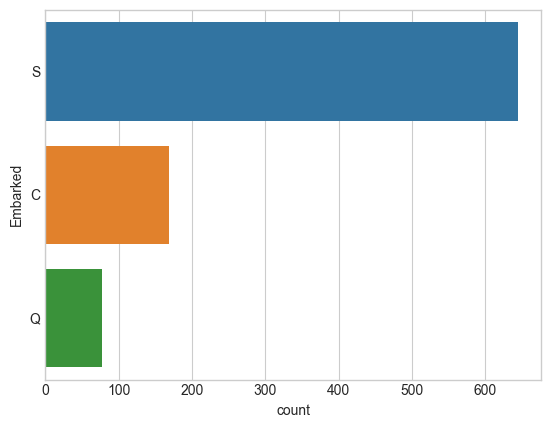

In [20]:
# What do the counts look like?
sns.countplot(y='Embarked', data=data);

## Heatmap or pairplot

In [21]:
age_fare = data[["Age", "Fare"]]

<Axes: >

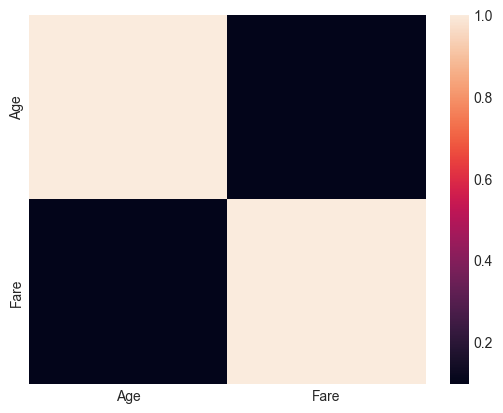

In [22]:
sns.heatmap(data=age_fare.corr()) 

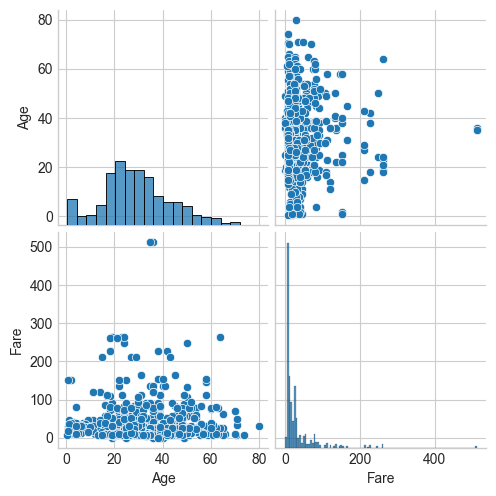

In [23]:
sns.pairplot(age_fare)

## Outline detection

### Z-score

In [24]:
age = data["Age"].dropna()
age_zscore = zscore(age)

# Confidence level: 99.4% 
is_outlier = age_zscore.apply(
  lambda x: x <= -2.5 or x >= 2.5
)

age[is_outlier]

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

### DBSCAN

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
age_fare_scaled = scaler.fit_transform(age_fare.dropna())

outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  n_jobs = -1)

clusters = outlier_detection.fit_predict(age_fare_scaled)

age_fare_cleaned = age_fare.dropna()[clusters!=-1]

age_fare_cleaned

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


## Handling missing data

In [26]:
imp = SimpleImputer(strategy='mean')
age_fare_cleaned = imp.fit_transform(age_fare)
age_fare_cleaned

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [29.69911765, 23.45      ],
       [26.        , 30.        ],
       [32.        ,  7.75      ]])